In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [179]:
#%matplotlib notebook

 # Video i/p 

In [180]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 6/0 - 2020-01-09 10-40-21-091.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

848.0

In [181]:
cap.set(cv2.CAP_PROP_POS_FRAMES,20)

True

In [182]:
#%matplotlib notebook

(1080, 1920, 3)


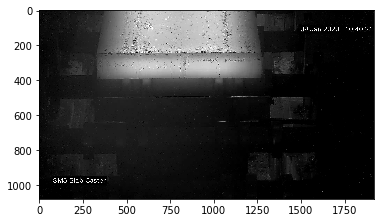

In [183]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [184]:
256,693,1397,693

(256, 693, 1397, 693)

In [185]:
#cv2.imwrite("toTatat1.jpg",frame)

In [186]:
#%matplotlib notebook

# pixels Per Metric

In [187]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
alar = [256,693 - 20,1397,693 -20]
alar = [314,360,1339,360]

In [188]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.6487804878048782 <<<<<-----------------MM per Pix


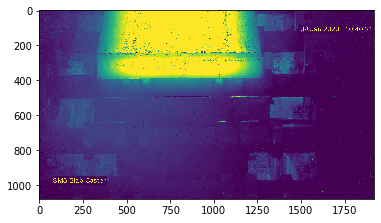

In [189]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#dst = cv2.addWeighted(y, 1.55, r, 1.21, 0.0)
dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)

plt.imshow(dst)

In [190]:
314,360,1339,360

(314, 360, 1339, 360)

In [191]:
leftCor = []
rightCor = []
while(True):
    ret, img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    #dst = cv2.addWeighted(y, .75, r, .601, 0.0)
    #dst = cv2.addWeighted(y, 1.55, r, 1.39, 0.0)
    
    dst = cv2.addWeighted(v, .002, r, 1, 0.0)
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    #_,thresh = cv2.threshold(blur,155,255,cv2.THRESH_BINARY)
    
    _,thresh = cv2.threshold(blur,190,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    
    _ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)
    val = 816
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1]
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix)
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]),alar[3]),(0,255,0),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2, (200,255,155), 2, cv2.LINE_AA)

    
    img1 = cv2.resize(img ,(900,500))
    img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img)
    #cv2.imshow('img ',img1)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [15]:
leftCor = np.array(leftCor)
rightCor = np.array(rightCor)

In [16]:
leftCor.max()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
%matplotlib notebook

In [ ]:
plt.imshow(dst)

# New approach 

In [214]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [215]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 6/0 - 2020-01-09 10-40-21-091.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

848.0

In [216]:
cap.set(cv2.CAP_PROP_POS_FRAMES,90)

True

In [217]:
window = 50

In [218]:
while(True):
    ret, img = cap.read()
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    trial = imgGray[alar[3],:]
    print("NEXT------------------------------------------------------------------------")
    for i in range (1920):

        avg = abs(int(sum(trial[i: i+window])/window - sum(trial[i+window: i+window+window ])/ window))
        print(avg)
        #print(img.shape)
        #img = cv2.circle(img,(i+1,alar[3]) , -1, (avg,0,0), 2)
        cv2.line(img,(i ,alar[3]),(i ,alar[3]-avg),(120+avg, 20+avg, 100*avg + 100),2)
        
        #i+=3
        if i+window >= 1920:
            break
    
    cv2.imshow('img ',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
        
    

NEXT------------------------------------------------------------------------
2
2
2
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
3
3
4
4
4
5
5
6
6
6
7
7
7
8
8
9
9
9
10
10
11
11
11
12
12
12
13
13
13
13
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
12
12
12
11
11
12
12
12
12
12
12
12
12
12
13
13
13
14
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
18
18
18
19
19
20
20
21
21
21
21
21
21
21
21
22
22
22
23
24
23
22
22
23
23
23
22
22
22
21
21
20
19
19
18
17
17
16
16
15
15
14
13
13
12
11
11
10
9
9
8
7
6
5
4
4
3
2
1
0
0
0
1
2
2
3
4
5
6
7
8
8
9
9
10
10
10
11
11
11
11
11
10
10
10
10
10
11
11
11
11
11
12
12
11
11
11
11
11
11
10
10
10
9
8
8
7
7
6
5
4
4
3
2
1
0
1
2
3
4
4
5
6
6
6
7
7
8
8
8
9
9
9
9
10
10
11
11
12
12
13
14
15
16
17
18
19
20
22
23
23
24
24
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
28
27
27
27
27
27
27
27
26
26
25
25
24
23
22
22
21
21
21
20
20
20
19
19
18
18
18
18
18
18
17
17
17
17
17
17
17
17
16
16
16
16
15
15

16
17
17
17
17
17
17
17
17
18
18
18
19
19
20
20
21
21
21
21
21
21
21
21
22
22
22
23
24
23
22
22
23
23
23
22
22
22
21
21
20
19
19
18
17
17
16
16
15
15
14
13
13
12
11
11
10
9
9
8
7
6
5
4
4
3
2
1
0
0
0
1
2
2
3
4
5
6
7
8
8
9
9
10
10
10
11
11
11
11
11
10
10
10
10
10
11
11
11
11
11
12
12
11
11
11
11
11
11
10
10
10
9
8
8
7
7
6
5
4
4
3
2
1
0
1
2
3
4
4
5
5
6
6
6
6
7
6
6
6
6
7
7
7
7
8
8
9
10
10
11
12
13
14
14
14
15
17
17
18
18
18
18
18
18
19
19
19
19
19
20
21
21
21
20
20
20
20
20
20
20
21
21
21
22
23
23
25
26
27
27
27
28
28
29
29
29
29
29
29
29
28
28
28
29
29
29
29
29
29
29
29
29
29
30
29
29
30
30
28
26
25
25
25
25
24
24
24
24
24
24
24
23
23
23
23
22
21
20
19
19
19
18
18
17
16
16
16
16
16
16
15
15
15
14
14
13
13
13
12
12
12
12
11
11
11
11
11
10
11
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
15
15
15
15
15
15
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
16
15
15
14
13
12
11
11
11
10
9
8
6
5
4
4
4
4
4
3
3
2
2
2
1
1
1
1
1
1
0
0
0
1
2
1
1
2
3
4
5
6
8
9
1

20
20
20
20
20
20
20
20
19
19
19
18
18
18
18
17
17
17
16
16
16
16
15
14
14
14
14
14
14
14
14
14
14
15
14
14
14
14
14
15
14
13
13
12
12
12
12
12
12
12
12
11
12
12
12
12
13
14
15
16
17
17
18
18
18
18
18
20
20
18
16
15
17
18
18
18
19
19
19
19
18
18
17
16
16
16
15
16
17
17
17
18
18
18
19
19
20
20
20
20
20
19
19
19
20
19
18
17
15
14
13
13
12
11
11
11
11
8
7
11
14
14
13
13
13
13
12
12
12
12
13
13
14
14
14
16
17
16
14
14
13
12
12
12
11
10
8
5
3
1
1
3
2
0
3
2
1
2
3
3
4
4
3
3
4
4
4
2
2
4
6
6
6
6
6
5
5
5
5
6
6
6
6
6
6
7
8
7
7
8
8
8
8
7
6
5
3
1
0
4
5
4
6
10
12
11
9
8
9
9
9
8
7
7
7
8
8
7
6
7
8
8
8
8
7
6
5
4
4
5
4
3
3
3
2
2
1
1
2
3
3
4
4
4
3
3
2
2
2
0
1
2
3
6
6
5
2
0
0
0
0
2
3
3
3
3
3
3
3
2
0
2
4
5
4
4
3
3
3
3
3
2
2
2
3
3
3
3
4
5
7
8
8
8
8
9
9
9
10
10
9
8
8
7
7
9
11
12
12
11
12
14
15
14
15
15
15
15
14
13
10
7
3
2
3
3
4
3
3
3
3
3
3
2
2
2
2
2
0
1
3
4
4
3
3
4
4
4
4
4
4
4
3
2
3
5
6
7
7
6
6
9
9
8
7
7
7
7
7
7
5
4
2
3
4
5
5
5
5
6
6
6
6
7
7
7
7
7
7
6
5
5
5
5
5
5
6
6
6
6
7
7
8
8
8
8
7
7
7
9
9
9
8
10
12
13
1

12
13
13
13
12
12
13
13
12
12
12
12
12
12
12
12
12
12
13
14
14
14
14
14
13
12
11
11
11
11
11
11
12
13
12
12
13
13
13
13
13
13
14
14
14
14
13
11
10
9
9
9
8
9
9
9
10
10
11
11
11
12
12
12
12
12
12
12
11
10
10
10
9
10
11
12
12
12
12
12
12
10
10
8
9
10
9
8
8
8
9
9
8
8
8
9
11
12
13
14
14
14
14
14
13
13
13
12
10
9
8
7
6
6
5
4
3
3
2
2
2
2
2
2
0
0
0
1
1
0
1
1
1
0
1
2
3
3
4
4
5
5
5
5
5
5
7
7
8
9
9
9
9
9
9
9
9
7
6
5
3
2
2
1
0
0
1
2
3
2
1
0
1
1
1
1
3
5
5
6
7
8
8
6
5
5
4
4
3
3
3
4
3
3
5
6
6
6
7
7
7
8
8
8
7
7
8
8
8
8
9
9
10
10
10
10
11
13
14
12
9
5
4
4
4
3
3
2
2
1
0
0
0
0
1
2
3
5
5
6
7
8
9
9
8
7
6
5
4
3
3
3
3
3
4
4
3
4
4
4
4
4
4
5
5
5
5
4
4
4
5
8
7
5
4
3
2
0
0
1
3
4
6
8
9
11
13
15
17
18
20
22
24
24
24
24
24
23
23
23
24
24
24
24
24
24
23
23
22
22
22
22
22
22
23
23
22
22
21
21
20
20
19
17
16
15
14
13
11
10
9
8
6
5
5
5
3
2
2
1
0
0
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
2
3
3
3
3
3
4
4
5
5
6
6
6
7
7
7
7
7
7
7
7
6
6
7
6
5
4
4
4
3
2
3
2
1
1
0
0
0
0
0
1
2
3
3
4
4
5
6
6
7
8
10
10
11
12
12
12
12
12
12
12
12
12


0
0
1
2
3
4
5
5
6
7
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
8
8
7
7
6
5
5
4
3
2
1
0
1
2
3
3
4
5
5
5
6
6
6
7
7
7
7
7
8
8
8
9
9
10
10
11
11
12
12
13
13
13
13
13
14
15
15
16
17
18
18
19
19
20
20
20
21
21
20
20
19
19
19
18
18
17
16
16
15
14
13
13
13
12
12
12
11
11
11
11
11
10
10
9
10
9
9
10
10
11
12
14
15
17
18
18
18
18
17
15
15
14
13
13
13
12
12
12
12
12
11
11
11
11
11
12
13
15
16
18
20
21
21
21
21
22
22
22
22
22
21
21
20
18
17
17
16
15
13
11
9
8
7
5
3
2
0
0
2
2
3
3
3
4
5
6
6
6
5
5
4
3
3
3
3
3
3
4
4
5
6
6
5
5
4
4
3
1
0
2
3
6
8
12
14
15
15
16
19
22
23
23
24
24
24
23
23
26
28
28
28
28
28
29
29
30
31
30
30
28
28
27
27
27
27
27
27
27
27
28
29
30
30
30
30
29
26
24
22
20
19
17
15
13
11
11
11
11
9
8
8
10
8
8
11
14
15
16
17
18
20
22
23
25
26
27
27
28
30
32
34
34
33
32
32
30
30
30
29
28
25
23
22
21
20
21
22
24
25
25
26
26
26
27
26
25
25
25
24
23
22
21
20
20
18
16
14
11
9
7
6
3
1
1
2
3
5
8
9
11
13
12
10
9
8
7
7
8
9
8
7
7
6
6
6
7
7
8
9
10
10
9
9
9
8
7
7
7
6
4
5
5


20
19
19
19
18
17
17
17
17
17
17
17
18
18
19
19
20
21
21
22
22
23
22
22
22
23
23
23
23
24
24
22
23
24
25
26
27
27
27
27
27
27
28
29
31
32
33
34
35
36
37
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
38
38
39
39
39
40
42
43
43
42
41
39
36
34
31
30
27
25
22
20
19
17
16
16
17
17
17
17
15
12
10
8
6
4
2
0
0
0
0
0
0
0
2
3
4
4
3
3
4
6
8
10
13
17
20
25
30
35
37
37
38
37
36
34
32
30
27
24
21
18
15
12
10
8
7
8
9
11
12
11
11
11
10
10
9
8
6
6
6
8
9
7
4
1
0
2
4
5
5
4
2
0
4
9
15
21
27
33
38
41
44
47
48
49
49
48
45
43
41
39
38
36
34
32
30
29
29
30
31
32
31
29
26
24
22
20
17
16
14
15
14
13
11
9
9
9
8
6
5
4
4
2
0
3
7
12
16
21
26
29
30
30
30
29
27
25
23
21
21
21
21
21
21
21
19
17
16
14
12
11
8
3
1
6
12
15
19
21
23
23
24
25
24
23
21
21
26
31
34
36
36
37
39
40
41
44
45
47
49
49
47
45
43
41
38
36
33
31
30
30
29
28
28
27
26
25
25
24
22
20
18
15
12
9
6
4
2
0
0
0
2
4
5
5
6
8
12
15
17
19
19
20
21
22
23
25
25
25
24
23
22
21
20
19
18
15
13
10
9
8
8
8
8
9
9
9
10
10
10
9
9
8
8
8
7
7
6
6
6
7
6
5
3
2
0
1
2
2
2
3
4
4


30
28
27
27
26
26
25
25
24
24
23
21
20
19
18
17
17
16
15
14
12
11
9
7
6
5
4
4
2
2
3
3
3
2
0
1
2
3
5
6
7
9
12
15
14
13
12
12
10
7
4
3
2
2
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
1
2
2
1
3
5
9
12
14
15
15
13
10
8
8
8
9
9
10
10
10
10
11
13
15
15
14
14
15
14
13
11
11
11
11
10
9
8
8
8
7
6
7
8
8
8
8
8
8
7
5
4
4
3
1
1
4
6
8
8
6
3
1
4
5
6
6
5
5
4
4
4
4
4
3
4
5
7
8
9
10
11
10
9
8
8
9
9
9
9
10
11
12
12
13
15
17
18
18
18
18
19
19
20
21
23
25
26
27
26
24
20
16
15
14
13
12
12
12
12
13
13
13
13
12
10
6
4
2
1
0
0
0
0
1
2
2
3
4
3
3
1
1
0
0
1
3
3
3
2
2
2
2
3
4
5
8
10
11
10
8
6
4
5
4
4
3
2
2
2
3
3
3
2
1
2
5
8
8
8
8
8
8
7
6
6
5
4
4
4
5
5
4
3
3
3
3
2
0
1
3
4
5
5
5
6
5
4
3
4
6
6
6
6
6
5
6
6
7
8
9
11
13
15
18
22
26
29
32
33
35
37
38
39
40
41
41
41
42
43
44
44
43
41
41
40
38
37
34
30
27
25
24
24
23
20
19
19
19
18
18
19
20
21
22
23
23
23
23
20
18
15
12
8
4
0
3
7
12
16
20
23
27
30
33
36
36
36
37
38
40
41
40
38
37
36
35
33
32
30
28
27
27
27
27
26
25
24
23
23
22
22
22
23
23
23
22
22
20
18
15
13
11
9
7
4
1
0
2
5
7
9
11
13


22
21
19
18
17
17
16
15
14
12
10
8
7
6
5
3
1
0
2
4
5
6
9
10
10
10
11
11
12
13
14
14
14
14
14
13
14
15
16
16
16
16
16
14
13
12
11
10
8
6
4
2
1
0
1
2
2
2
2
3
3
3
3
3
3
4
4
4
4
5
6
8
10
10
9
8
8
7
6
6
7
7
7
7
7
8
8
8
8
8
8
8
7
7
6
5
4
3
1
0
2
3
5
6
7
7
7
7
7
6
6
5
5
5
4
4
4
3
3
3
4
6
7
6
5
3
2
1
0
1
1
1
1
1
1
1
1
1
1
1
2
2
1
0
0
0
1
2
3
4
5
6
7
8
8
8
8
8
8
7
6
5
5
5
4
4
4
4
3
3
3
3
3
3
2
1
0
0
1
1
1
1
1
1
2
2
3
2
2
2
0
0
0
3
4
5
5
5
6
6
6
6
6
6
6
7
7
7
7
6
6
6
5
5
5
5
4
4
4
3
3
2
2
1
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
3
1
0
1
4
5
5
5
5
5
5
5
4
4
4
3
4
5
5
6
6
6
7
7
7
7
7
7
7
7
6
6
6
5
5
4
4
3
3
3
3
3
4
4
4
3
3
3
3
3
2
3
4
4
4
4
5
5
6
7
8
9
9
7
5
3
0
1
2
3
4
5
5
6
6
6
7
7
7
8
9
9
9
9
8
7
7
8
9
10
11
12
13
14
14
14
14
15
15
15
16
16
16
17
19
20
21
22
23
24
26
27
26
22
18
13
8
5
3
3
2
2
2
1
2
3
4
5
5
5
5
5
6
7
10
13
15
15
13
13
12
12
11
10
9
8
8
7
6
6
5
5
4
4
3
3
3
3
3
3
2
2
3
5
8
11
13
15
17
17
17
17
17
17
16
14
12
11
11
11
10
9
7
3
0
4
7
9
9
10
12
12
12
11
10
9
7
5
3
1
0
0
1
2
2
3
3
3
3
2
2
2
2

6
8
9
9
9
9
8
9
9
8
6
5
2
0
1
0
1
3
5
7
9
12
16
19
22
23
23
22
21
22
23
24
21
24
27
26
25
23
21
20
20
19
18
16
13
11
10
10
10
10
10
11
12
13
13
13
12
12
12
12
12
13
14
16
16
14
11
9
8
7
6
4
2
0
2
2
2
2
2
4
5
7
9
13
14
13
15
17
18
18
18
18
19
19
19
20
21
21
22
23
25
27
29
30
29
27
25
24
22
22
21
21
21
22
22
20
17
15
14
13
13
12
12
12
12
13
13
13
11
9
6
1
4
9
11
13
16
21
24
25
24
24
26
27
28
30
30
30
29
29
30
31
32
33
32
30
28
27
26
25
24
24
24
24
24
23
21
20
18
16
15
13
12
11
10
11
11
11
10
8
6
3
0
1
2
3
5
7
9
9
8
8
9
9
11
13
14
16
17
17
19
20
21
22
22
22
21
21
21
21
21
22
22
22
22
22
22
21
20
19
18
16
14
10
8
8
9
9
9
10
10
10
10
11
12
12
13
13
14
14
15
15
15
15
13
10
8
5
2
0
1
3
5
6
6
7
7
8
9
10
11
13
13
14
14
15
16
16
16
15
15
15
14
13
12
11
12
13
14
15
15
16
17
18
19
20
21
21
22
22
22
23
23
23
22
21
19
18
17
15
14
14
13
12
12
12
12
11
11
10
10
9
9
9
8
8
8
8
9
9
9
9
10
10
10
11
13
13
13
15
15
15
16
16
16
14
13
12
12
13
12
11
11
12
12
12
13
13
13
13
13
13
12
12
13
13
13
13
14
14
14
14


25
26
26
27
27
28
28
29
29
30
30
31
31
31
32
32
31
31
31
30
30
29
30
29
29
30
29
30
30
30
30
30
30
31
31
31
31
31
31
30
30
30
30
31
31
31
31
30
30
30
30
29
29
29
29
28
28
28
28
28
28
28
28
28
28
28
29
29
29
30
30
30
29
28
27
26
26
25
25
25
25
25
26
25
23
22
20
19
18
17
16
14
13
12
11
9
8
7
6
5
5
5
5
6
7
7
8
9
9
9
8
7
5
5
5
5
5
6
6
7
7
8
9
11
12
12
13
14
13
13
13
12
12
14
18
20
22
23
23
24
25
27
29
30
31
33
35
37
38
39
39
39
39
37
36
35
34
32
30
30
30
33
35
36
35
34
34
33
32
30
28
26
24
22
21
21
20
20
20
18
18
18
18
16
12
10
12
14
15
15
14
15
14
12
11
12
11
11
10
9
10
10
11
11
11
11
11
12
14
14
15
15
14
13
13
13
13
12
12
12
13
15
17
19
20
19
19
18
20
21
22
21
20
20
23
23
20
17
17
19
20
20
21
22
22
21
20
21
20
20
19
17
16
15
15
16
16
16
15
15
14
12
11
12
12
12
12
12
12
13
14
13
12
10
9
8
8
7
7
6
4
4
5
6
5
5
6
6
6
4
2
2
2
2
3
4
4
3
3
4
5
6
7
7
6
5
4
4
3
3
4
5
4
2
0
0
0
0
1
2
3
3
3
2
2
2
2
2
2
2
2
1
2
3
3
4
4
5
6
6
7
7
9
10
11
12
12
12
13
13
14
14
14
15
14
14
14
14
14
14
14
15
14
13
12
11


32
32
32
32
32
32
32
32
32
32
31
31
31
32
32
32
32
32
31
31
32
33
33
33
32
31
30
29
29
28
27
26
25
25
25
26
26
26
26
25
24
23
23
23
23
23
24
24
24
24
24
24
24
23
22
21
22
22
23
24
24
24
24
23
23
22
21
20
20
19
18
15
14
15
17
19
20
20
20
21
22
24
25
23
21
19
17
16
15
15
16
17
15
14
13
11
9
7
5
5
4
3
3
4
6
6
5
3
1
0
0
2
3
4
4
4
2
0
0
0
0
0
0
1
4
5
6
6
4
4
3
3
3
1
2
5
7
9
9
10
10
12
14
16
17
20
23
27
29
30
30
31
31
31
31
31
31
31
32
34
34
35
35
35
35
34
33
30
28
27
26
25
25
26
28
29
28
27
25
23
20
18
17
15
13
10
9
8
9
10
9
7
5
3
1
1
3
6
7
8
8
9
10
12
13
13
13
14
16
17
17
16
15
14
13
12
12
9
5
2
0
3
4
4
3
2
2
3
4
5
6
6
7
7
7
7
7
5
3
1
0
0
1
1
1
2
2
2
1
1
0
1
1
2
2
2
3
6
7
7
7
6
5
4
3
2
2
0
1
3
6
7
9
9
10
10
10
11
11
11
10
9
8
8
6
5
5
5
4
3
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
2
3
4
5
5
6
6
7
7
7
6
6
6
6
5
5
5
5
5
4
4
4
4
4
5
6
7
7
7
8
8
8
7
7
6
5
4
3
2
2
1
0
0
0
0
1
1
1
1
0
1
2
4
5
7
8
9
10
11
11
11
10
10
9
8
8
8
7
7
8
8
8
7
8
9
10
10
10
10


28
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
33
32
31
30
29
27
27
28
29
29
29
29
28
28
28
28
28
29
29
29
29
28
28
27
27
28
28
29
28
27
27
27
27
27
26
25
25
25
25
25
25
25
25
24
24
25
26
26
25
24
25
27
29
31
33
36
36
35
33
31
31
32
33
33
32
32
31
31
30
29
29
29
30
30
30
29
27
25
26
26
25
23
21
21
22
22
22
22
20
19
19
17
15
14
14
13
12
11
11
11
10
8
6
5
3
1
0
0
1
1
0
1
3
3
2
1
2
2
1
1
0
0
1
1
1
1
0
0
0
1
0
3
5
5
5
4
5
6
8
10
10
12
15
16
16
15
16
16
16
16
17
19
20
21
21
20
22
22
22
24
26
26
26
26
24
22
23
23
23
23
22
21
20
20
19
18
17
17
17
18
17
15
15
14
13
12
11
9
6
5
3
1
0
2
3
4
5
5
5
6
8
10
12
13
13
13
14
14
15
16
17
17
17
17
16
16
17
19
20
20
20
19
19
19
18
16
16
15
14
14
14
14
14
14
14
13
11
9
8
7
5
4
2
0
1
3
5
4
4
5
6
7
8
9
8
7
6
6
6
6
6
6
6
7
7
7
8
9
9
10
10
9
9
9
9
8
8
8
7
6
6
6
6
6
5
5
4
3
2
2
1
0
1
2
4
6
6
7
7
7
8
9
9
9
7
3
3
2
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1

3
4
5
6
7
7
8
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
10
10
10
9
9
8
8
7
7
6
5
5
4
3
2
1
0
0
1
2
3
4
5
6
7
8
8
9
10
10
11
11
11
12
12
12
12
13
13
14
14
15
16
17
17
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
29
29
29
29
30
30
30
30
30
30
30
30
29
29
29
29
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
31
32
32
33
32
32
32
32
31
31
30
28
26
25
25
25
24
24
24
24
23
22
22
22
22
22
22
22
22
21
21
21
21
21
21
21
20
20
20
20
20
20
20
20
19
19
19
19
19
19
19
18
17
16
17
16
15
14
13
12
13
15
17
17
17
16
14
13
13
13
13
13
11
10
9
8
7
6
5
4
2
1
0
1
2
2
2
2
3
4
6
9
11
11
11
11
12
13
13
13
14
14
14
14
14
13
11
8
6
4
3
3
2
0
1
4
6
9
10
10
11
13
15
16
17
17
17
17
18
19
20
22
23
24
23
22
21
20
21
23
27
32
36
37
37
36
37
38
37
37
38
39
40
40
39
38
37
35
33
30
28
25
21
19
16
14
11
9
8
8
6
5
5
5
6
7
8
9
10
10
10


21
20
20
19
18
18
17
17
16
15
15
14
14
13
13
12
11
11
10
10
9
9
8
8
7
7
6
5
4
4
3
2
1
1
0
0
1
1
2
3
4
5
6
7
7
8
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
10
10
10
9
9
8
8
7
7
6
5
5
4
3
2
1
0
0
1
2
3
4
5
6
7
8
8
9
10
10
11
11
11
12
12
12
12
13
13
14
14
15
16
17
17
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
30
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
32
32
32
32
32
32
32
32
32
32
32
31
31
32
32
32
32
32
32
31
30
29
26
25
24
23
22
22
21
21
21
21
21
21
21
21
21
21
20
20
20
19
18
17
17
16
15
14
12
11
9
8
6
4
1
0
2
3
4
6
6
6
8
9
11
12
13
14
15
14
13
10
7
5
4
4
3
2
2
2
3
4
5
5
5
6
6
6
7
7
8
8
7
6
7
6
5
3
1
1
3
6
9
13
17
21
24
26
28
30
32
32
33
35
35
36
37
37
36
36
36
35
34
33
33
34
33
32
31
32
32
33
34
34
34
34
34
34
34
35
35
35


10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
10
10
10
9
9
8
8
7
7
6
5
5
4
3
2
1
0
0
1
2
3
4
5
6
7
8
8
9
10
10
11
11
11
12
12
12
12
13
13
14
14
15
16
17
17
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
30
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
32
32
32
32
31
31
31
30
30
30
31
31
31
31
31
30
29
28
27
27
27
27
27
28
28
29
30
30
30
30
29
29
28
28
28
29
29
29
28
28
28
28
27
27
27
27
27
27
26
26
26
26
26
27
27
27
28
29
29
28
27
27
25
23
21
21
22
23
24
23
22
20
20
19
18
14
12
11
10
10
10
10
10
9
9
10
9
8
8
7
6
5
4
3
2
2
1
0
0
0
0
0
0
1
1
2
3
3
4
3
3
3
0
3
6
8
9
9
10
11
13
14
15
15
15
17
18
19
20
20
21
22
22
22
20
18
19
19
19
20
20
21
22
23
25
26
26
27
26
26
26
26
25
25
25
25
25
25
24
24
23
22
19
15
11
8
4
1
1
3
4
5
8
10
11
12
12
14
14
13
14
15
16
16
16
15
15
16
16
15
14
13
13
15
17
17
16

NEXT------------------------------------------------------------------------
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
4
4
5
5
5
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
8
9
9
8
9
9
9
9
9
10
10
10
9
9
9
10
10
11
11
11
11
10
10
10
10
10
10
10
10
10
11
11
11
11
12
12
13
13
14
15
16
16
17
18
18
19
19
19
20
20
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
21
21
20
20
20
20
21
21
21
21
21
21
21
21
21
21
20
20
19
19
18
18
17
16
15
15
14
13
13
12
11
11
10
10
9
8
8
7
7
6
6
6
6
5
4
3
3
2
1
0
0
0
1
2
2
3
4
5
6
7
7
8
8
9
9
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
10
10
9
8
7
7
6
5
4
3
2
1
0
0
1
2
3
3
4
5
6
6
7
7
8
9
9
10
10
11
12
12
13
14
14
15
16
17
17
18
19
20
21
22
22
23
24
24
24
25
25
25
26
26
26
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
28
28
28
27
27
27
28
28
28
28
28
28
28
28
28
29
30
3

NEXT------------------------------------------------------------------------
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
4
4
5
5
5
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
8
9
9
8
9
9
9
9
9
10
10
10
9
9
9
10
10
11
11
11
11
10
10
10
10
10
10
10
10
10
11
11
11
11
12
12
13
13
14
15
16
16
17
18
18
19
19
19
20
20
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
21
21
20
20
20
20
21
21
21
21
21
21
21
21
21
21
20
20
19
19
18
18
17
16
15
15
14
13
13
12
11
11
10
10
9
8
8
7
7
6
6
6
6
5
4
3
3
2
1
0
0
0
1
2
2
3
4
5
6
7
7
8
8
9
9
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
10
10
9
8
7
7
6
5
4
3
2
1
0
0
1
2
3
3
4
5
6
6
7
7
8
9
9
10
10
11
12
12
13
14
14
15
16
17
17
18
19
20
21
22
22
23
24
24
24
25
25
25
26
26
26
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
28
28
28
27
27
27
28
28
28
28
28
28
28
28
28
27
26
2

NEXT------------------------------------------------------------------------
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
1
1
2
2
2
2
2
3
3
3
3
4
4
5
5
5
6
6
6
7
7
7
7
7
8
8
8
8
8
8
8
8
8
9
9
9
8
9
9
8
9
9
9
9
9
10
10
10
9
9
9
10
10
11
11
11
11
10
10
10
10
10
10
10
10
10
11
11
11
11
12
12
13
13
14
15
16
16
17
18
18
19
19
19
20
20
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
21
21
20
20
20
20
21
21
21
21
21
21
21
21
21
21
20
20
19
19
18
18
17
16
15
15
14
13
13
12
11
11
10
10
9
8
8
7
7
6
6
6
6
5
4
3
3
2
1
0
0
0
1
2
2
3
4
5
6
7
7
8
8
9
9
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
10
10
9
8
7
7
6
5
4
3
2
1
0
0
1
2
3
3
4
5
6
6
7
7
8
9
9
10
10
11
12
12
13
14
14
15
16
17
17
18
19
20
21
22
22
23
24
24
24
25
25
25
26
26
26
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
28
28
28
27
27
27
28
28
28
28
28
28
28
28
28
27
25
2

19
18
19
19
19
19
19
20
20
20
20
21
21
20
21
21
19
19
20
20
19
19
19
19
19
19
18
17
15
12
11
10
8
8
6
4
3
2
1
3
7
10
12
12
12
12
12
13
14
15
16
17
16
16
15
15
14
14
13
12
11
10
10
10
10
9
10
9
9
9
9
9
9
9
8
7
7
7
9
11
13
15
17
19
22
25
27
28
29
30
29
30
30
32
32
31
30
28
27
27
26
25
25
25
25
25
25
25
26
27
29
28
27
27
27
27
27
27
26
26
26
25
25
24
25
25
25
25
25
24
23
21
20
19
17
14
11
11
10
9
7
6
4
3
2
3
3
3
3
2
2
2
2
2
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
2
2
2
2
2
3
3
2
2
3
5
7
7
7
7
7
6
6
7
7
6
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
6
5
5
5
4
2
0
1
3
4
4
5
5
5
5
5
6
7
7
7
7
8
8
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
8
7
6
5
4
3
2
2
1
1
1
1
2
2
2
1
1
0
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
2
2
2
2
1
0
1
1
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
2
2
2
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
2
2
2
0
0
1
2
2
2
2
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
3
3
3
3
3
3
3


1
1
1
1
2
1
1
2
2
1
1
0
0
1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
3
4
5
6
6
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
5
5
5
6
7
7
6
7
7
7
7
7
6
6
6
6
6
7
7
7
6
6
6
6
6
5
5
5
3
2
0
2
4
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
6
6
6
6
7
7
7
7
7
7
6
6
6
7
8
9
8
7
6
6
7
7
7
7
7
6
5
4
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
0
1
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
1
1
1
1
1
1
1
2
2
3
3
4
5
5
5
5
5
5
4
1
1
3
5
6
6
5
5
5
5
5
5
4
4
4
4
4
3
3
3
2
2
2
2
2
2
1
1
0
1
3
5
8
9
10
12
13
15
15
15
15
14
14
14
14
15
15
16
16
17
18
20
21
22
23
23
23
23
23
23
23
24
24
24
24
24
25
25
25
25
25
26
26
26
27
27
27
27
26
23
20
18
15
12
11
9
6
3
2

13
15
15
13
9
6
6
10
12
12
11
11
11
12
12
11
10
9
10
10
10
10
9
10
9
8
6
5
6
6
5
6
9
12
15
16
16
15
15
15
15
15
15
15
15
16
16
15
14
13
12
11
10
10
11
11
10
8
7
7
7
6
6
6
6
6
6
6
5
3
2
2
3
2
2
5
8
9
8
8
9
9
7
6
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
0
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
5
8
11
12
13
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
8
2
3
7
8
8
8
8
8
8
9
9
8
8
8
9
9
10
10
10
10
11
11
10
10
10
9
8
7
6
4
2
0
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
3
5
8
10
11
10
10
10
10
10
10
10
10
10
9
10
10
11
11
12
12
12
12
12
11
10
9
7
4
1
2
6
10
13
15
16
17
17
16
16
16
16
17
17
17
17
17
17
17
17
17
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
17
17
17
16
15
14
12
10
8
6
5
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
1
1
0
1
3
5
7
10
12
14
14
14


13
17
18
18
17
16
16
16
16
13
12
12
13
13
15
18
20
21
23
24
25
25
25
25
25
25
24
22
21
19
17
16
16
15
14
14
15
15
15
15
15
15
15
15
15
14
12
10
9
7
4
2
1
1
1
1
1
1
1
2
2
2
2
1
0
0
1
2
3
3
4
4
4
4
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
1
1
0
1
1
1
0
0
0
1
1
2
2
2
1
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
3
3
3
3
3
2
2
2
2
2
3
2
2
2
2
3
3
3
2
2
3
3
4
3
3
2
3
4
5
6
7
7
7
6
4
1
0
0
0
0
1
3
4
5
5
6
6
6
7
7
7
7
7
8
8
8
8
8
8
9
10
11
13
14
15
17
18
18
16
16
16
17
18
19
20
21
21
22
22
23
24
23
22
21
21
19
18
18
20
21
20
17
15
14
14
1

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
2
2
2
2
3
3
2
2
2
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
2
4
4
5
5
6
6
7
7
9
11
13
15
15
16
17
17
17
18
20
21
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
26
27
28
28
27
27
27
27
27
26
25
24
24
24
23
23
24
24
23
22
20
17
14
13
11
10
9
9
8
6
5
5
5
6
7
8
9
9
9
10
10
10
10
10
11
11
11
12
12
13
13
13
12
13
14
14
15
15
15
16
17
17
18
19
19
20
21
22
24
26
28
30
32
34
36
37
38
38
39
40
40
41
41
40
40
40
40
40
40
40
39
40
40
40
40
39
40
40
39
39
38
38
39
38
38
38
38
38
39
40
40
41
41
41
40
40
38
36
34
32
30
28
27
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
29
28
27
26
25
24
24
24
23
23
23
24
25
26
27
28
29
29
29
30
31
31
32
32
32
32
32
33
33
33
34
34
34
35
35
35
36
36
36
36
36
37
37
37
38
38
37
38
38
38
39
39
40
41
41
42
42
42
43
43
43
42
42
42
41
41
41
41
41
40
37
36
34
33
32
31
30
28
26
24
23
21
19
18
16

39
41
42
43
44
45
46
47
45
43
41
39
37
36
36
35
34
35
35
36
37
38
38
38
38
38
39
40
40
39
38
38
38
36
34
33
34
34
33
32
32
31
27
23
19
17
14
10
7
4
1
0
2
2
4
6
8
9
8
7
5
3
2
2
0
0
0
0
1
3
4
5
6
7
7
7
7
8
7
6
6
5
5
3
1
0
0
0
0
0
1
1
3
6
8
9
11
13
15
16
18
19
20
21
21
23
24
25
25
25
25
25
25
25
25
24
25
27
30
31
32
33
35
36
37
38
39
39
39
39
39
39
39
38
36
36
36
36
36
37
37
37
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
38
36
36
36
35
34
33
32
31
31
30
30
30
30
30
29
30
31
31
31
31
31
30
30
31
31
32
32
32
32
32
33
33
34
34
34
35
35
35
35
36
36
36
36
37
37
37
38
38
38
38
38
39
39
39
40
41
41
42
42
42
43
43
42
42
42
42
42
41
41
41
40
40
39
37
35
34
33
32
31
29
28
26
24
22
20
19
17
15
13
11
9
7
7
6
4
2
1
0
2
3
4
5
6
7
9
10
11
12
13
14
16
17
16
16
17
17
17
17
18
19
20
21
22
21
22
22
22
22
22
22
21
20
19
19
18
17
17
16
14
13
11
11
12
12
11
11
11
10
8
8
8
8
8
8
7
7
7
7
6
6
6
5
6
6
6
7
7
7
6
5
3
1
0
1
2
3
5
6
7
8
9
10
11
12
13
14
14
15
15
16
16
17
19
20
21
22
23
2

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
6
7
9
11
12
13
12
12
12
12
12
12
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
8
8
7
6
2
1
6
10
14
18
21
23
22
22
22
22
21
21
21
20
20
19
19
19
18
18
18
18
18
18
17
16
15
14
13
12
12
11
11
12
12
11
11
10
10
10
9
9
9
8
7
7
7
7
3
0
1
3
5
7
9
10
9
9
9
9
9
9
9
9
9
9
10
9
10
10
11
12
12
13
12
11
9
7
6
6
5
4
5
7
8
9
10
12
13
14
15
16
17
18
19
20
22
25
25
27
28
30
31
32
32
33
33
34
35
37
38
40
42
44
46
49
52
55
57
58
58
59
58
58
58
58
59
61
61
61
62
62
62
59
57
55
52
50
48
47
45
44
42
40
38
36
33
30
27
24
21
19
18
18
18
18
17
17
15
13
11
8
4
0
2
6
12
18
21
24
26
26
27
27
26
23
23
23
22
22
21
21
20
19
17
16
15
13
12
11
10
8
7
6
4
3
1
0
1
3
4
6
6
7
7
7
7
7
8
9
11
12
14
16
18
20
23
26
28
30
31
32
33
34
34
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
35
34
33
33
32
32
31
31
31
31
30
30
30
30
30
30
30
30
30
31
31
32
32
32
32


2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
4
4
4
5
5
5
5
6
6
6
6
6
5
5
5
5
5
5
5
6
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
5
5
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
4
4
4
4
4
4
4
4
4
4
3
3
3
2
2
2
2
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
3
4
4
3
3
4
5
7
8
9
9
11
12
13
15
16
17
18
18
18
19
19
19
20
20
22
24
26
29
31
33
34
34
35
37
40
41
42
44
45
45
46
46
47
48
49
49
50
51
52
52
52
52
53
53
51
49
46
44
44
43
41
38
36
34
32
30
28
27
27
27
28
27
26
26
24
20
16
12
8
5
4
5
4
0
4
6
7
9
10
11
11
11
11
13
14
15
16
17
18
18
18
17
17
16
14
13
11
9
9
8
7
5
4
3
1
0
1
2
2
3
3
3
4
4
6
8
10
13
15
17
18
18
19
21
23
24
25
26
27
28
28
28
28


22
22
21
21
21
20
20
20
20
20
20
20
20
20
21
21
20
19
19
19
18
18
18
18
18
18
18
17
17
16
16
15
15
14
13
13
13
13
13
13
13
12
12
12
13
13
13
12
12
11
11
11
10
10
10
9
9
8
8
7
7
6
6
5
3
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
1
0
0
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
3
3
3
2
3
3
2
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
3
3
3
3
3
3
3
2
0
1
1
1
1
2
3
3
3
4
4
4
4
4
4
4
4
4
5
5
6
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
7
8
8
8
8
9
10
10
10
11
10
10
10
10
9
8
9
9
8
8
8
9
10
10
10
10
10
10
10
10
10
9
9
8
8
8
7
7
7
7
6
6
6
6
6
5
5
4
4
4
4
3
3
3
3
2
2
1
0
0
0
0
0
1
2
2
3
4
4
4
6
8
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
9
9
9
9
9
9
9
9
8
8
8
8
8
8
7
7
6
6
6
6
5
4
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
7
7
7
6
6
6
6
6

7
7
8
9
9
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
11
10
10
10
9
9
8
7
6
6
5
4
3
2
1
0
0
1
2
3
4
4
5
5
6
7
8
8
9
9
10
11
11
12
13
13
14
15
15
16
17
17
18
19
20
21
21
22
23
23
24
24
25
25
26
26
26
27
27
27
27
28
28
28
28
29
29
29
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
30
29
29
28
28
28
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
25
25
25
25
25
25
25
25
24
25
25
25
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
28
28
28
28
28
28
28
28
28
29
29
29
31
32
31
30
31
31
32
32
34
33
33
33
34
33
31
30
30
30
30
30
29
29
29
29
28
28
28
26
24
22
21
20
19
19
18
17
16
14
12
11
9
8
7
5
4
4
3
0
2
3
4
4
4
3
4
4
6
7
8
9
10
10
8
6
2
1
2
3
3
4
4
4
4
4
5
6
5
2
0
3
5
6
5
6
7
8
9
11
13
15
17
18
20
22
24
24
26
30
34
36
36
34
33
33
32
33
34
34
34
35
34
34
32
30
28
27
27
27
27
27
26
26
25
25
25
25
25
23
21
19
18
17
17
16
15
15
14
13
12
11
10

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
2
2
1
1
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
4
4
4
5
5
6
6
6
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
12
12
13
14
14
15
16
17
17
18
18
19
19
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
20
20
20
19
18
18
17
17
16
15
14
14
13
12
11
11
10
9
9
8
8
7
6
6
5
5
4
4
3
3
2
1
0
0
0
1
2
2
3
4
5
6
6
7
8
8
9
9
10
10
11
12
12
12
12
12
12
12
12
12
12
13
12
12
12
12
12
12
12
12
12
11
11
10
10
9
9
8
8
7
6
6
5
4
3
2
1
0
0
1
1
2
3
4
5
6
6
7
8
8
9
10
10
11
12
12
13
14
14
15
16
16
17
17
18
19
20
20
21
22
23
23
24
24
24
25
25
25
25
26
26
26
26
27
27
27
27
27
27
27
27
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30


4
4
4
4
4
4
4
4
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
3
3
3
4
5
5
6
6
7
7
8
8
9
9
9
9
10
10
10
10
10
10
10
10
11
11
11
10
10
10
11
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
13
14
14
15
16
17
17
18
18
19
19
20
20
20
21

38
38
38
39
39
39
39
39
40
40
40
40
40
40
40
39
39
38
38
38
37
37
37
36
35
34
33
32
31
29
28
27
25
24
22
20
19
17
15
14
12
11
9
7
6
4
3
1
0
0
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
17
17
17
17
18
19
20
20
21
21
21
22
22
22
22
22
23
22
22
21
21
20
19
18
18
17
16
15
14
13
13
12
11
11
11
10
9
9
9
9
8
8
8
8
8
7
7
7
6
6
7
7
7
7
5
4
3
2
1
0
0
1
3
4
5
6
8
9
10
11
12
13
13
14
15
15
16
17
17
18
19
20
21
22
23
23
23
24
24
25
25
26
26
27
27
28
28
29
29
29
30
31
31
31
30
30
30
29
29
28
28
27
26
25
25
24
23
22
21
19
18
18
17
17
16
15
15
14
13
12
11
10
8
7
6
6
6
6
6
6
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
6
6
6
6
7
7
8
8
8
8
8
9
9
9
9
10
10
11
12
13
14
14
14
13
13
12
11
11
10
9
9
8
8
7
7
6
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
1
1
1
0
0
0
0
0
0
1
1
1
2
2
2
3
3
3
4
3
3
3
3
2
2
2
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
4
4
4
4
4
4
4
4
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


9
9
8
7
6
5
4
3
3
3
3
2
1
1
0
0
2
3
4
6
7
7
8
8
9
10
11
13
14
16
17
19
21
21
21
21
22
22
24
25
26
28
28
29
29
30
31
32
33
33
34
35
34
33
33
32
32
32
32
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
33
33
33
33
34
34
34
34
34
34
34
34
35
35
34
34
34
34
34
33
33
33
33
32
32
32
31
31
31
31
31
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
31
31
32
33
32
32
32
33
33
33
34
34
34
35
35
35
36
36
36
37
37
37
38
38
38
38
39
39
39
39
40
40
40
40
40
40
40
41
41
41
40
40
40
39
39
39
38
38
38
37
36
35
33
32
32
31
30
29
27
25
23
21
20
18
16
14
12
10
9
7
5
4
2
0
0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
15
16
17
17
17
18
19
19
20
21
22
22
23
24
24
25
25
26
26
25
24
23
21
20
19
18
17
16
15
14
13
12
11
10
9
8
8
8
8
7
7
7
7
7
7
6
6
6
5
5
5
4
5
4
4
3
2
0
0
1
2
3
4
7
8
9
10
12
13
14
14
15
15
15
16
16
17
17
18
18
19
19
19
20
20
21
21
22
22
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
28
28
27
27
27
26
26
26
25
24
24
23
22
21
21
20
19
19
18
17
17
16
16
15
14
14
13
12
12
11
10
9
9
8
9
9
10
9
9
9
9
9
8
8
8
7
7
7

10
11
11
12
13
14
14
15
16
16
16
16
17
17
17
16
16
16
16
16
17
17
17
18
18
19
19
19
20
20
20
21
21
21
21
21
20
20
20
20
20
20
20
20
20
20
20
20
19
19
17
16
15
14
13
12
11
11
11
11
11
11
11
10
10
10
10
11
11
11
12
11
11
10
10
10
10
10
9
9
9
9
9
10
10
10
12
13
13
13
13
13
13
13
13
14
14
15
15
16
17
17
18
19
20
21
22
22
23
23
23
24
24
24
25
25
25
25
26
26
26
27
28
28
29
29
30
30
31
31
31
31
32
32
32
32
32
31
32
32
32
32
32
33
33
33
33
34
34
34
34
34
34
34
34
34
33
33
33
33
33
33
33
34
34
33
33
33
33
33
33
32
32
32
32
32
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
30
30
30
29
29
29
29
29
29
29
29
30
30
31
32
32
32
32
32
32
33
33
34
34
35
35
35
36
36
37
37
37
37
38
38
38
39
39
39
39
39
40
40
40
40
40
41
41
41
41
41
41
41
40
40
40
40
39
39
39
38
38
37
35
34
33
33
32
31
30
28
26
24
22
20
18
16
14
12
11
9
7
6
4
2
1
0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
16
17
17
17
17
19
20
21
22
23
23
24
24
25
26
26
27
27
26
25
24
22
21
20
19
17
16
15
14
13
12
11
11
10
9
8
7
7
7
6
6
6
6
6
6
6
5
5
5
5
5

19
18
18
18
18
17
17
17
16
17
18
19
18
17
17
16
16
17
18
18
17
15
13
12
12
11
10
9
8
7
6
4
3
2
1
0
1
2
3
4
5
7
7
7
7
7
7
7
7
7
6
5
5
5
5
5
5
5
5
5
6
7
7
7
7
7
7
8
9
9
8
5
4
3
3
3
2
2
2
2
2
2
3
3
2
2
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
1
2
2
3
3
3
3
3
3
3
3
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
0
2
3
4
6
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
4
4
4
3
3
3
3
3
2
2
2
2
1
0
2
5
7
10
12
16
19
19
20
19
19
19
19
19
19
19
18
18
17
17
17
17
17
17
16
16
16
16
16
16
16
16
15
14
14
13
12
11
10
8
8
8
8
8
8
7
7
6
6
5
3
1
0
1
2
4
6
6
6
6
7
7
7
7
7
7
7
6
6
6
6
6
7
7
7
7
7
7
7
7
7
8
7
6
6
6
5
4
4
3
3
4
4
5
5
6
6
6
7
7
7
8
8
9
9
9
10
10
10
10
10
11
11
12
12
12
12
13
13
13
13
13
13
14
14
15
15
16
16
16
16
16
17
17
18
18
18
19
20
20
20
20
21
21
20
20
19
19
18
18
17
17
16
16
15
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
17
17
17
17
17
17
17
17
17
18
18
18
18


6
4
3
3
2
2
2
2
3
3
2
0
0
2
4
6
7
9
10
12
13
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
14
15
15
15
14
14
14
13
13
12
11
10
9
9
9
10
11
11
12
12
11
9
6
3
1
0
2
3
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
9
9
10
10
10
9
8
6
5
5
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
3
3
3
3
3
4
4
4
4
5
5
5
5
5
5
5
6
6
6
6
5
5
4
3
3
2
2
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
3
3
4
4
4
5
5
5
5
5
5
5
5
4
3
2
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
1
1
0
0
0
1
2
3
4
4
5
6
7
9
10
12
13
13
13
13
13
14
15
15
15
16
16
17
18
19
21
22
22
22
23
23
24
24
24
25
25
26
26
26
27
27
27
27
26
25
26
25
25
24
24
23
22
21
21
20
20
21
21
20
18
17
15
15
14
14
14
13
13
13
13
13
13
12
11
10
7
6
7
7
7
7
7
8
8
9
10
11
12
13
14
15
17
19
21
22
21
22
22
22
23
23
24
24
24
25
25
25
25
26
27
27
28
29
30
30
31
31
31
31

25
26
26
27
27
25
22
20
20
20
20
21
22
22
22
22
22
22
22
22
21
21
21
21
22
22
21
21
19
19
18
17
17
16
15
13
12
10
8
8
8
8
9
9
8
7
6
5
4
4
2
0
0
1
1
0
3
6
8
9
7
5
3
3
2
1
0
0
0
1
2
3
3
2
1
2
4
6
8
9
9
8
8
7
7
8
10
13
15
15
13
12
11
10
10
11
12
12
11
10
8
8
8
8
8
7
5
3
1
1
2
4
4
4
4
4
4
4
3
3
1
0
0
0
1
3
6
9
11
12
11
9
7
4
2
1
0
0
1
0
0
1
2
2
3
3
4
5
6
9
13
14
14
14
14
13
13
13
13
12
11
11
11
11
11
11
11
12
13
13
14
15
15
16
17
19
20
20
21
21
20
19
17
16
14
12
11
10
9
9
8
8
8
7
7
6
4
3
2
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
2
3
5
5
6
8
9
10
11
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
12
12
11
10
10
9
9
8
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
4
4
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
0
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
5
5
5
5
5
5
5
4
2
0
2
4
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5


16
17
17
17
17
17
17
17
17
17
18
18
18
18
18
17
17
17
16
15
15
14
13
13
13
12
12
12
11
11
11
10
10
10
10
10
9
9
9
9
8
8
7
7
6
5
5
4
3
2
2
1
0
0
1
1
2
3
4
5
6
7
8
9
10
9
10
10
10
10
10
10
10
10
10
11
11
11
12
12
12
13
13
13
13
13
13
12
12
12
11
11
10
9
9
8
7
6
5
5
4
3
2
1
0
0
1
2
3
4
5
6
7
9
10
10
11
11
12
12
13
13
14
15
15
15
16
17
17
18
19
20
21
22
23
23
24
24
24
24
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
28
28
28
28
28
28
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
28
28
28
28
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
25
24
23
22
21
20
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
18
18
19
19
19
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
18
18
18
18
18
18
18
17
17
18
18
18
17
16
15
14
12
11
11
11
11
11
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
11
14
16


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
4
4
4
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
9
9
9
9
10
10
10
11
11
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
16
16
16
16
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
18
18
18
18
18
17
17
17
16
15
14
14
13
13
13
12
12
12
11
11
11
10
10
10
10
10
9
9
9
9
8
8
7
7
6
5
5
4
3
2
2
1
0
0
1
1
2
3
4
5
6
7
8
9
9
9
9
10
10
9
9
10
10
10
11
11
11
11
12
12
12
13
13
13
13
13
13
12
12
12
11
11
10
9
9
8
7
7
6
5
4
3
2
1
0
0
1
1
2
3
4
5
7
8
8
9
10
10
11
11
12
12
13
13
14
15
15
15
16
16
17
18
19


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
4
4
4
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
9
9
9
9
10
10
10
11
11
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
16
16
16
16
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
18
18
18
18
18
17
17
17
16
15
14
14
13
13
13
12
12
12
11


1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
4
4
4
5
5
5
6
6
6
6
7
7
7
8
8
8
9
9
9
9
9
10
10
10
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
13
13
13
13
14
14
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
18
18
18
18
18
18
18


6
6
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
6
6
6
6
6
6
7
7
8
9
9
9
9
8
8
8
7
7
7
7
7
6
6
6
6
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1

22
22
23
23
23
22
22
22
22
23
24
23
22
21
20
18
17
16
16
15
14
13
12
11
10
9
9
9
9
9
9
9
8
8
8
8
7
7
7
6
6
7
8
6
4
2
1
0
0
1
2
3
4
5
6
7
8
9
10
11
13
14
14
15
15
16
17
17
18
19
19
20
20
21
21
21
22
23
23
24
24
25
25
26
26
27
27
28
28
28
28
29
30
29
28
28
28
27
27
27
26
26
25
25
24
23
23
22
21
21
20
19
18
18
17
16
15
14
14
13
12
11
11
10
9
9
9
8
8
8
8
8
8
8
8
7
7
7
6
6
6
6
6
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
6
6
6
6
6
6
7
7
8
9
9
9
9
8
8
8
7
7
7
7
7
6
6
6
6
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

31
32
32
33
33
33
34
34
34
34
34
35
35
35
35
36
36
36
36
36
36
37
37
37
37
37
38
38
37
37
37
37
36
36
36
36
35
35
34
33
32
31
29
28
27
26
25
24
22
20
18
16
14
12
10
9
7
5
4
2
0
0
2
3
4
6
6
7
8
9
10
11
12
13
14
15
16
17
17
18
18
18
19
20
21
21
22
23
23
24
24
24
23
23
23
23
24
24
22
21
20
18
17
16
15
14
13
12
11
10
9
7
6
6
6
6
7
7
7
7
6
6
6
6
6
5
5
5
4
4
4
4
3
2
1
0
0
1
2
3
4
5
6
7
8
9
10
11
11
12
12
12
12
13
14
14
15
15
16
16
16
17
17
18
19
21
22
23
23
24
24
25
25
26
27
27
28
29
29
29
29
29
29
29
29
28
28
28
28
27
27
26
25
25
24
23
23
22
21
21
20
20
19
18
17
17
16
15
14
14
13
12
12
11
10
10
9
9
9
9
9
9
9
8
8
7
7
6
6
6
6
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
6
6
6
6
6
6
7
7
8
9
9
9
9
8
8
8
7
7
7
7
7
6
6
6
6
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

5
4
3
2
1
0
0
0
0
1
1
1
2
2
2
1
1
1
0
0
0
0
0
0
1
1
2
2
2
3
3
3
3
3
3
3
2
3
3
3
3
3
3
4
5
5
5
5
4
4
4
4
4
4
4
5
7
9
11
13
14
16
17
17
18
19
20
21
22
22
22
22
22
23
23
23
25
26
27
28
28
28
27
27
27
27
27
27
27
27
27
27
28
28
28
28
29
29
29
29
30
30
30
29
27
25
22
18
15
11
8
6
5
4
3
2
2
2
1
1
2
3
3
2
2
1
1
4
5
6
6
5
4
4
3
2
2
1
1
0
0
0
0
1
1
2
2
2
3
3
4
4
5
5
6
8
10
12
14
16
17
19
20
20
21
22
22
22
23
24
24
23
24
25
25
26
28
30
31
32
33
33
33
33
33
33
32
32
33
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
34
34
34
34
34
34
33
33
33
33
33
33
32
32
32
32
32
32
31
31
31
31
30
30
30
30
31
30
30
30
30
30
30
29
29
29
29
29
28
28
28
28
27
27
27
27
26
26
26
26
26
26
26
26
26
26
27
27
27
28
28
28
28
29
29
30
30
30
31
31
31
32
32
33
33
33
34
34
35
35
35
36
36
36
36
37
37
37
38
38
38
38
39
39
39
39
38
38
38
37
37
37
37
37
36
35
34
33
32
31
30
28
27
26
25
24
23
21
19
17
15
13
12
10
8
6
5
3
1
0
1
2
3
4
5
6
7
8
9
11
12
13
14
15
15
16
16
16
16
17
18
19
20
20
21
21
22
22
23
23
22
22
21


11
12
10
11
12
11
10
8
7
6
5
4
3
3
2
2
2
2
1
2
2
3
2
2
1
0
0
1
1
1
1
3
3
4
4
4
4
4
3
2
2
2
2
2
3
3
3
3
3
4
5
5
5
5
5
5
5
4
4
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
2
2
1
0
0
1
2
3
4
4
4
4
4
4
4
4
3
4
5
6
7
7
7
7
7
7
7
7
7
7
8
8
8
9
9
9
9
8
8
8
8
8
8
8
8
7
7
7
6
6
6
5
5
4
4
3
3
2
2
2
2
2
2
2
2
2
3
2
2
1
0
0
0
0
0
1
1
2
2
3
3
4
5
6
7
7
6
6
6
6
6
6
6
6
6
5
5
5
5
4
4
4
4
4
4
4
4
5
5
5
6
6
7
7
7
8
8
8
9
9
9
9
9
9
8
8
8
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
4
5
5
6
5
5
5
4
4
4
3
3
3
3
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
1

6
6
6
6
7
8
8
9
10
10
10
10
10
9
9
8
7
7
7
8
9
9
10
10
10
10
9
9
9
8
8
8
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
5
4
4
3
3
4
4
4
4
5
5
6
6
6
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
6
6
6
6
5
4
4
3
3
3
2
2
2
3
2
2
2
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
6
7
7
8
7
6
5
5
4
4
4
4
4
4
3
3
2
2
2
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
2
3
3
4
4
4
4
5
5
5
6
6
7
7
7
7
5
2
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
2
2
3
3
3
3
3
3
4
4
3
3
3
2
2
1
1
0
0
0
0
0
1
0
4
9
13
14
14
14
13
13
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
10
8
7
6
5
3
3
3
3
1
0
0
0
0
0
0
1
2
3
4
4
5
6
6
6
4
2
0
2
3
3
3
2
2
2
2
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
0
0
0
0
0
0
0
0
1
1
0
1
3
5
6
8
10
12
14
15
16
17
19
19
19
21
22
23
25
27
29
30
32
34
35
36
35
36
36
36
36
37
37
37
38
38
39
39
39
39
39
39
39
39
39
39
40
40
42
42
41
40
38
40
40
39
38
35
33
32
30
26
24
22
21
19
18
16
13
10
7
5
3
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
3
4
4
4
4
3
3
3
4


23
22
21
20
19
18
17
15
14
13
12
11
10
8
7
6
5
4
4
3
3
2
2
1
1
1
0
0
0
0
0
1
1
2
3
4
4
2
2
2
2
2
2
2
2
0
1
1
1
1
0
0
1
4
6
10
12
15
17
19
21
22
24
26
28
30
31
32
32
32
33
34
35
35
35
35
34
34
34
34
35
35
35
36
37
38
38
36
34
34
34
33
33
33
33
33
33
34
33
33
32
31
30
26
22
19
17
15
13
12
10
9
8
7
6
4
3
2
1
1
0
1
3
3
3
3
3
3
3
4
4
4
5
5
5
6
6
7
7
7
7
7
8
8
8
8
8
8
8
8
8
7
7
6
5
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
0
0
0
1
1
1
1
1
1
2
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
7
7
7
7
7
7
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
3
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
5
5
5
5
7
7
7
6
7
7
7
8
8
8
8
8
8
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
4
3
2
3
3
2
1
1
0
0
0
1
1
2
2
1
0
0
0
0
3
4
4
4
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
9
9
9
10
10
10
9
9
9
9
10
10
9
9
8
8
8
7
7
7
7
8
8
9
9
9
8
8
8
7
6
6
6
6
5
5
5
5
6
5
5
5
5
4
4
4
4
4
4
4
3
3
3
2
2
2
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2


7
7
6
5
5
6
6
5
5
5
5
6
6
6
6
7
8
8
9
9
9
8
7
6
7
8
8
7
5
4
5
4
3
3
3
3
3
4
5
7
8
10
12
13
13
13
14
13
13
14
14
14
15
15
15
16
16
17
18
19
20
21
22
22
22
22
22
23
23
23
24
24
25
26
26
26
25
26
28
28
28
29
29
30
30
31
31
31
31
30
31
31
31
32
32
32
32
33
33
33
33
33
33
34
34
34
33
33
33
33
33
32
32
32
32
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
30
30
30
29
29
29
29
30
31
31
30
30
29
30
29
29
29
28
28
28
28
28
28
28
28
28
28
28
29
29
30
30
31
32
32
33
33
33
34
34
34
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
38
38
38
37
36
35
34
32
31
29
28
27
26
24
22
21
19
17
16
14
13
11
10
8
7
6
4
3
2
1
0
0
1
2
3
3
4
5
6
7
8
9
10
11
12
12
13
14
15
16
16
16
17
18
19
20
21
21
21
20
20
21
21
20
19
18
17
17
16
16
15
14
13
12
12
11
11
10
10
9
9
9
9
10
10
10
10
10
10
10
9
9
8
7
7
6
5
4
3
3
2
1
0
1
3
4
6
7
9
10
10
12
12
13
13
14
15
15
16
17
17
17
17
17
18
18
19
19
19
20
20
21
22
22
23
24
24
25
26
26
26
27
27
27
27
27
27
26
26
26
25
25
24
24
23
22


3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
0
0
0
0
0
0
0
2
2
2
2
2
2
2
3
3
4
4
4
5
5
4
4
3
3
2
2
2
2
2
2
2
2
1
1
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
1
1
1
1
1
1
2
2
2
2
2
2
2
1
1
1
0
0
0
0
0
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
3
4
6
7
7
7
7
7
7
7
8
8
8
8
8
7
6
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
1
1
0
0
0
0
0
0
0
2
3
3
4
4
4
4
4
4
4
4
4
4
5
5
4
1
1
2
2
2
2
2
2
2
2
1
1
1
1
1
1
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
3
4
3
3
3
4
4
6
7
8
9
11
13
16
18
19
19
20
21
21
21
22
23
23
24
25
26
27
27
28
28
27
27
27
27
27
28
29
30
31
32
33
34
35
37
39
39
39
39
37
35
35
36
38
38
38
37
36
34
32
29
27
25
23
20
19
20
20
18
18
19
18
17
16
15
13
12
12
12
12
12
12
13
13
13
12
11
9
8
6
5
4
3
1
0
1
1
1
1
0
0
1
0
0
0
0
1
2
4
5
7
9
10
12
13
14
14
15
16
16
16
16
17
18
19
20
21
21
21
22
22
22
23
23
23
24
24
25
26
28
29
29
30
32
33
33
33
33
33
33
33
33
34
34
33
33
33
33
33
32
32
32
32
31
31
31
31
31
31
31
31
31
31

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
4
4
4
3
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
4
4
5
5
5
5
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
2
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
2
2
2
2
2
2
2
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
2
1
0
0
0
0
0
0
0
1
1
3
3
4
4
4
4
4
4
5
5
5
6
6
6
6
6
7
7
8
9
10
11
13
14
16
16
16
17
18
19
19
20
20
21
21
21
21
21
22
24
24
25
25
25
26
26
26
26
26
26
26
25
25
25
25
25
25
25
25
26
26
25
24
25
24
24
24
23
22
21
19
16
14
12
11
11
11
11
9
8
7
7
6
5
6
6
6
6
7
6
6
5
4
4
4
4
5
5
5
5
6
6
7
7
7
7
8
8
8
8
8
9
10
10
10
11
12
12
13
14
16
18
19
21
22
22
23
23
24
25
26
26
27
28
28
28
28
28
28
29
29
30
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32


1
1
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
6
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
3
3
3
1
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
5
5
6
7
8
10
11
12
14
16
19
21
23
24
26
26
27
27
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
31
32
32
33
33
34
34
34
33
32
30
29
29
29
27
24
22
19
17
14
12
9
6
3
0
0
1
1
1
2
2
1
2
1
1
1
0
0
0
0
0
0
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
6
7
7
7
9
11
12
14
16
18
19
21
23
25
27
28
29
29
30
30
30
30
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
32
32
32
31
31
31
31
30
30
30
30
30
30
30
30
30
30
29
29
29
29
29
29
29
29
29
28
28
28
28
29
30
30
30
29
29
29
29
28
28
28
28
28
28
28
28
28
28
29
28
29
29
30
3

6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
7
7
7
7
7
7
8
8
8
8
8
9
9
9
9
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
8
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
0
0
0
1
1
2
2
3
3
3
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
5
5
3
1
1
0
0
1
1
2
2
3
3
4
5
4
3
3
3
4
4
4
4
4
4
4
3
3
3
3
3
3
2
2
2
1
1
1
1
1
0
0
1
2
3
4
4
3
3
4
4
4
5
6
7
7
8
9
11
13
14
15
16
18
19
19
19
19
20
20
21
22
22
22
23
23
24
26
26
27
28
29
29
28
28
28
28
28
28
28
27
25
25
23
21
20
21
22
23
22
22
21
21
20
20
21
22
21
16
13
12
10
8
7
7
7
7
7
7
7
7
6
6
6
6
6
4
1
2
1
0
1
0
0
0
1
1
1
2
2
3
4
5
5
7
8
7
7
7
8
8


4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
5
5
6
6
5
3
3
3
3
3
3
3
3
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
5
5
6
5
5
5
6
5
6
6
6
5
5
5
5
5
4
4
4
4
4
5
5
5
6
6
6
6
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
0
0
1
3
4
6
7
7
8
9
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
11
10
10
9
7
5
2
0
1
2
4
5
7
9
10
10
10
10
10
11
11
10
11
10
10
10
10
10
10
10
10
10
10
9
9
9
8
8
7
7
6
7
7
7
6
6
5
5
6
6
5
5
5
5
4
2
2
1
0
0
2
3
4
7
7
7
8
10
10
10
12
14
15
16
16
16
17
18
20
22
23
25
25
26
26
25
24
23
23
23
22
24
26
26
25
24
24
25
26
26
26
26
27
28
28
29
29
30
30
29
28
28
27
26
27
28
26
24
24
23
19
16
14
12
12
12
11
9
7
4
2
1
0

25
25
24
25
26
27
27
27
27
27
27
27
26
24
22
20
18
15
13
10
8
6
5
5
6
6
7
8
8
8
7
8
8
8
8
7
7
7
7
8
7
7
6
6
6
6
5
4
2
0
2
4
6
8
10
11
12
13
14
16
18
17
15
12
9
6
2
1
5
10
14
17
18
17
15
13
12
11
10
9
9
8
7
7
8
8
8
7
6
5
5
5
5
5
5
5
6
8
11
14
17
20
22
24
25
26
26
27
28
29
30
29
27
25
23
21
18
15
13
10
8
6
5
6
6
7
7
7
7
7
7
7
7
7
7
6
6
6
6
7
7
6
6
5
5
5
4
3
1
0
2
3
4
6
7
7
7
8
8
8
8
8
8
8
9
8
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
5
6
6
7
7
7
6
7
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
6
5
4
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
1


27
27
27
27
27
28
28
28
29
29
30
31
31
31
30
30
30
30
30
30
30
30
31
32
34
35
34
34
34
34
33
33
32
32
31
31
31
30
29
28
28
27
27
27
26
26
26
26
26
26
24
22
20
19
17
16
15
15
14
12
10
9
8
8
8
8
7
6
5
3
2
0
3
6
8
8
7
8
10
11
12
13
13
14
15
15
15
15
14
13
14
15
15
16
17
18
18
19
20
19
17
13
10
8
7
6
6
6
6
6
6
6
6
6
6
6
6
6
5
3
0
3
7
10
11
10
9
10
13
15
17
18
20
21
22
23
23
22
21
21
22
24
25
27
29
30
30
30
31
30
28
26
25
23
22
21
20
20
20
20
21
21
20
20
20
19
19
19
19
17
16
14
12
10
9
9
9
9
7
6
5
4
3
2
1
0
0
0
0
0
0
1
2
3
5
6
6
6
7
7
7
7
7
7
7
7
7
6
6
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
5
5
4
4
3
3
3
3
3
3
3
2
2
3
3
4
4
4
5
5
5
4
4
4
4
3
3
3
3
3
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
2
2
3
4
5
5
5
6
5
5
6
6
5
5
4
4
3
2
1
0
0
1
2
2
2
2
3
3
3
3
3
4
4
5
5
6
6
6
6
7
8
8
8
9
10
10
11
10
9
9
9
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
9
9
8
7
7
7
7
6
6
6
6
6
5
5
5
5
4
4
4
3
3
2
2
2
1
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6


8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
8
8
8
7
7
7
6
6
5
5
4
3
3
2
1
0
0
0
1
2
3
4
5
5
6
7
8
8
9
10
10
11
11
11
12
12
13
13
14
14
15
15
16
17
18
18
19
20
21
21
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
26
26
26
26
26
26
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
31
31
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
30
30
30
30
29
29
29
29
29
29
29
28
27
26
25
25
26
26
25
24
24
24
24
24
23
23
23
23
23
23
23
22
22
22
22
21
21
21
22
22
22
21
21
20
21
21
21
21
22
22
21
21
21
20
20
19
19
18
18
17
16
17
19
21
22
23
21
21
22
24
24
23
22
22
22
21
21
20
20
19
18
17
16
13
10
8
6
4
1
1
2
4
5
6
8
8
7
8
10
10
9
8
7
6
6
5
5
4
3
1
0
0
2
3
5
6
6
5
6
7
7
6
6
6
6
6
6
6
6
5
3
2
1
3
7
11
15
17
21
25
27
29
33
35
36
35
33
33
34
34
32
30
28
27
26
25
25
24
23
21
20
19


NEXT------------------------------------------------------------------------
3
3
2
2
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11
11
11
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
16
16
16
16
16
17
17
17
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
17
17
16
15
15
14
14
13
13
12
12
11
11
10
10
9
9
9
9
8
8
7
7
7
6
6
5
4
4
3
2
1
0
0
0
1
2
2
3
4
4
5
6
6
7
7
8
8
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
8
8
8
7
7
7
6
6
5
5
4
3
3
2
1
0
0
0
1
2
3
4
5
5
6
7
8
8
9
10
10
11
11
11
12
12
13
13
14
14
15
15
16
17
18
18
19
20
21
21
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
26
26
26
26
26
26
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
30


10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
16
16
16
16
16
17
17
17
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
17
17
16
15
15
14
14
13
13
12
12
11
11
10
10
9
9
9
9
8
8
7
7
7
6
6
5
4
4
3
2
1
0
0
0
1
2
2
3
4
4
5
6
6
7
7
8
8
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
8
8
8
7
7
7
6
6
5
5
4
3
3
2
1
0
0
0
1
2
3
4
5
5
6
7
8
8
9
10
10
11
11
11
12
12
13
13
14
14
15
15
16
17
18
18
19
20
21
21
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
26
26
26
26
26
26
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
31
31
31
31
31
31
31
31
31
30
30
29
29
29
28
28
28
27
27
27
27
27
27
27
27
27


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
2
2
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11
11
11
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
16
16
16
16
16
17
17
17
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
17
17
16
15
15
14
14
13
13
12
12
11
11
10
10
9
9
9
9
8
8
7
7
7
6
6
5
4
4
3
2
1
0
0
0
1
2
2
3
4
4
5
6
6
7
7
8
8
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
8
8
8
7
7
7
6
6
5
5
4
3
3
2
1
0
0
0
1
2
3
4
5
5
6
7
8
8
9
10
10
11
11
11
12
12
13
13
14
14
15
15
16
17
18
18
19
20
21
21
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
26
26
26
26
26
26
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26

3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
2
2
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11
11
11
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
16
16
16
16

4
4
4
4
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
2
2
2
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11
11
11
10
10
10
10

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
3
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
3
3
3
3
4
4
4
4
4
4
5
5
5
5
6
6
7
7
7
8
8
8
9
9
9
10
10
10
10
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
14
14
14
15
15
16
17
17
18
18
18
18
18
18
18
18
18
18
17
16
16
15
15
15
15
15
15
15
15


21
21
20
19
19
18
17
17
16
15
14
13
13
14
13
11
10
10
10
10
10
9
9
10
10
10
10
10
10
10
9
9
9
8
8
7
7
6
6
6
5
5
4
2
0
1
2
4
6
7
8
10
10
11
12
12
13
14
14
15
16
16
17
18
19
18
19
20
20
21
21
22
23
24
24
25
26
26
27
27
28
28
28
29
29
29
29
29
29
29
29
29
28
27
27
26
25
24
23
22
22
21
20
19
18
18
17
16
16
15
14
13
13
12
12
11
10
10
9
9
9
9
8
8
8
8
7
7
7
7
7
7
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
10
10
9
9
9
9
8
8
8
7
7
6
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
3
3
3
3
2
2
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

10
11
12
12
10
8
9
9
9
9
8
8
8
8
7
7
7
7
9
9
10
11
11
11
11
12
14
17
18
17
16
15
14
13
14
14
14
14
15
16
16
17
17
18
18
19
20
19
19
20
20
20
20
21
22
23
23
22
22
22
22
22
23
23
23
23
22
21
19
17
14
11
10
9
7
6
4
0
0
2
3
3
4
4
4
4
4
3
3
2
2
1
1
1
0
1
2
0
0
0
0
0
0
0
0
0
1
2
3
3
4
4
4
4
4
5
5
7
8
10
13
15
17
20
23
24
25
26
27
26
26
27
27
28
28
29
30
30
31
32
32
33
34
34
35
37
37
37
37
38
38
38
38
38
38
38
38
37
37
37
37
38
38
38
39
39
40
40
39
39
38
37
37
36
35
35
35
35
35
35
35
35
35
35
34
34
34
33
33
33
33
32
32
32
31
31
31
31
31
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
28
28
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
26
26
27
27
27
28
28
28
29
29
29
30
30
31
31
31
32
32
32
32
32
33
33
33
33
33
33
34
34
34
34
35
35
35
35
35
35
35
35
34
34
34
34
34
34
34
34
34
34
34
33
32
31
30
29
28
26
24
23
22
20
19
17
15
14
12
11
10
8
6
5
4
3
2
1
0
0
1
2
3
4
5
5
6
7
8
9
9
10
10
11
11
11
12
12
13
15
16
17
17
18
19
19
19
20
20
18
17
17
16
15
14
14
13
12
11
11
11
9
7
6
7
7
6
6
6
6
6
6
6
6
6


10
10
9
9
9
8
7
7
6
6
5
4
3
3
3
4
4
3
3
2
2
3
2
1
1
1
0
2
3
6
9
11
13
14
15
15
17
18
18
18
18
18
18
19
19
20
20
21
22
22
22
22
23
24
26
25
23
23
23
23
23
22
22
23
24
26
27
27
26
24
25
27
27
27
29
31
30
29
27
26
23
20
17
15
15
14
12
10
10
9
9
9
9
9
8
8
7
6
6
5
6
5
5
3
1
2
3
4
3
3
3
2
2
2
1
1
1
1
2
3
3
3
3
3
2
2
3
4
5
6
8
10
12
14
15
16
18
20
20
21
22
22
23
23
24
25
26
27
28
28
28
29
30
31
32
32
32
33
33
34
34
35
35
35
35
35
35
35
35
35
36
36
36
37
37
37
37
37
37
36
36
36
36
36
36
35
35
35
35
35
35
35
34
34
34
33
33
33
33
32
32
32
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
30
29
29
29
28
28
28
28
28
28
28
28
28
28
27
27
27
27
26
26
26
27
27
27
27
28
28
28
29
29
29
30
30
31
31
31
32
32
32
32
32
33
33
33
33
33
33
34
34
34
34
35
35
35
35
35
35
35
35
35
34
34
34
34
33
34
34
34
34
33
33
32
31
30
29
28
27
26
25
24
23
21
20
18
17
16
15
13
11
10
9
7
6
5
4
3
2
1
0
0
0
1
2
2
3
4
5
5
6
7
7
8
8
8
8
9
10
12
13
14
15
16
16
17
17
18
18
18
18
18
18
17
17
16
15
16
17
15
13
13
12
12
12
11
11
11
11

5
5
5
5
5
4
4
4
4
4
4
5
5
5
5
5
5
6
6
7
7
7
8
7
6
6
5
6
6
5
5
5
5
5
5
5
5
5
6
6
7
8
8
9
9
10
10
10
10
11
11
11
11
11
12
12
12
12
12
12
12
11
11
10
9
8
8
7
6
5
3
2
1
1
1
0
0
0
1
1
1
2
2
2
3
3
3
3
4
4
5
5
6
6
6
7
7
8
8
8
9
9
10
10
10
11
11
11
11
11
11
10
9
8
7
6
5
4
3
0
2
3
4
5
5
5
6
6
6
7
7
8
8
8
8
8
9
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
9
9
8
7
6
5
4
4
3
2
0
0
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
4
4
4
4
4
4
3
3
3
3
2
2
2
2
2
2
1
1
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
4
4
3
3
3
4
4
5
5
6
7
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
5
3
2
2
2
1
1
1
1
0
0
1
1
0
0
1
0
0
0
1
3
4
6
8
9
9
8
7
7
7
7
7
6
6
6
7
7
7
7
7
7
7
7
7
9
10
9
9
9
9
7
4
2
1
0
0
0
1
1
1
1
1
1
2
3
3
3
3
2
3
3
3
3
4
3
2
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
2
3
3
4
4
4
4
5
6
9
11
14
16
17
17
20
21
22
23
26
28
29
30
31
33
33
32
32
32
31
30
29
29
28
28
27
27
27
28
30
31
32
34
35
35
35
34
34
34
33
32
30
29
28
28
28


5
5
5
5
5
4
4
4
4
3
3
3
3
3
3
3
3
3
4
3
3
3
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
3
3
3
3
2
2
2
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
2
3
3
3
3
4
4
5
6
6
6
6
6
7
7
7
7
7
6
6
6
6
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
2
3
3
2
2
2
2
2
1
0
0
0
1
2
3
5
6
8
8
9
10
10
11
10
10
10
10
10
10
10
9
9
10
10
11
12
12
13
14
15
16
16
17
18
19
20
21
22
22
21
21
23
23
23
23
24
25
25
25
24
25
25
23
21
19
18
17
16
15
15
15
14
15
17
18
19
20
21
21
22
23
23
23
22
21
21
20
19
18
15
15
14
14
13
12
11
11
11
12
12
12
12
12
13
13
13
13
13
14
14
14
14
16
17
18
19
20
21
21
22
22
22
22
21
21
21
21
21
21
21


27
27
27
27
27
28
28
28
28
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
29
29
28
27
26
24
21
20
18
17
16
15
15
14
14
13
11
9
7
6
6
6
5
4
1
0
2
4
6
7
9
13
16
17
18
18
19
20
20
21
21
22
22
23
24
25
26
26
27
27
28
28
27
25
23
19
15
12
10
8
5
3
3
4
4
3
1
0
1
2
3
5
7
10
14
16
20
22
24
26
31
38
43
46
48
47
48
49
49
49
49
49
50
51
52
53
54
55
56
56
57
57
56
55
53
50
46
43
40
37
35
34
34
34
34
34
32
32
31
30
28
27
26
24
22
21
20
19
17
17
14
10
6
3
2
1
1
0
0
0
0
1
3
4
6
7
8
10
11
12
12
12
12
12
11
9
7
3
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
4
4
4
5
5
5
4
4
4
4
4
4
4
4
4
3
3
2
2
1
1
1
1
1
1
1
2
3
4
5
7
8
9
9
9
8
8
8
8
8
9
9
9
9
9
9
9
9
8
7
7
7
7
6
6
6
6
6
5
5
5
5
4
4
4
4
4
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

16
16
17
17
17
17
17
17
17
18
17
17
17
17
16
16
15
15
15
15
15
15
15
15
15
16
16
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
13
12
12
12
11
11
10
10
9
9
9
8
8
7
7
6
6
6
6
7
7
7
7
6
6
5
5
4
3
3
2
1
1
0
0
1
1
2
3
3
4
4
5
5
6
6
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
9
9
8
8
7
6
5
5
4
3
2
1
0
0
1
2
3
4
4
5
6
6
7
7
8
8
9
10
10
10
11
11
12
12
13
13
14
15
15
16
17
18
19
19
20
21
21
21
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
27
27
27
27
27
27
27
28
27
27
27
27
27
27
27
27
27
26
26
26
26
26
26
26
26
26
26
26
26
26
26
25
25
26
26
26
26
26
25
24
23
22
21
19
19
20
20
20
20
20
19
18
17
15
13
12
12
12
12
12
12
13
13
11
8
4
2
1
1
2
2
0
0
1
1
2
2
3
4
5
6
6
7
10
13
1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
3
2
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
3
3
3
3
4
4
4
4
4
4
5
5
5
5
6
6
7
7
7
8
8
8
9
9
9
10
10
10
10
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
18
17
17
17
17
16
16
15
15
15
15
15
15
15
15
15
16
16
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
13
12
12
12
11
11
10
10
9
9
9
8
8
7
7
6
6
6
6
7
7
7
7
6
6
5
5
4
3
3
2
1
1
0
0
1
1
2
3
3
4
4
5
5
6
6
7
7
8
8
8
8
9
9
9
9
9
10
10
10
10
11
11
11
11
10
10
10
10
11
11
11
10
10
9
9
8
7
7
6
5
4
3
2
1
0
0
1
2
2
3
4
5
5
6
7
7
8
9
10
10
11
11
12
12
13
14
14
15
16
17
17
18
19
20
21
21
22
22
22
23
23
23
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
2

2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
3
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
7
7
8
8
8
9
9
9
10
10
10
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
12
12
12
12
13
13
13
13
13
14
14
14
15
15
15
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
16
15


26
26
25
24
23
22
22
21
20
19
18
17
17
16
15
15
14
13
13
13
12
12
11
11
10
9
9
8
8
8
8
8
8
7
7
7
7
7
7
7
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
10
10
9
9
9
9
8
8
8
7
7
6
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
3
3
3
3
2
2
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT-----------------

27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
29
29
29
28
28
28
28
27
27
27
26
26
26
25
25
24
24
24
23
23
23
24
25
26
27
27
27
27
27
28
28
28
28
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
29
29
29
29
29
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
29
28
27
26
26
24
23
21
20
19
17
16
15
13
12
11
10
9
8
7
6
5
4
3
2
1
0
0
0
1
2
3
3
4
5
6
6
7
8
8
9
10
10
11
12
12
13
14
15
17
17
18
18
19
19
18
17
16
16
15
14
14
14
13
13
12
12
12
11
11
11
10
10
10
10
10
10
10
10
10
10
11
11
11
10
10
10
9
9
8
8
7
7
5
4
4
3
1
0
1
3
4
6
7
8
9
9
10
11
12
12
13
14
15
16
16
17
17
18
18
19
19
20
21
21
22
23
23
24
24
25
25
26
26
27
27
28
28
28
28
28
28
28
27
27
27
26
25
25
24
23
22
21
21
20
19
19
18
17
16
15
15
14
13
13
12
12
11
11
10
9
9
9
8
8
8
8
8
8
8
7
7
7
7
7
7
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
8
8
8
8
9
9
10
10
9
9
9
9
8
8
8
7
7
6
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
3
3
3
3
2
2
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1

2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
0
0
0
0
0
1
1
1
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
3
4
6
7
8
9
10
10
10
11
11
11
11
11
11
11
10
10
9
7
7
7
7
7
7
8
9
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
12
12
12
10
9
6
4
3
0
2
5
6
7
7
7
6
4
2
2
1
0
1
2
4
6
9
13
15
18
21
23
24
24
25
26
26
26
26
26
27
27
27
28
28
28
28
28
29
29
29
28
27
28
31
34
36
37
36
37
39
41
42
42
41
40
38
35
33
32
31
29
27
25
23
20
15
11
6
2
2
5
8
9
10
11
12
11
11
11
11
11
11
10
10
10
10
10
9
9
8
8
7
7
8
9
9
8
6
5
5
5
4
3
2
1
0
1
3
4
5
6
8
9
11
13
16
18
21
23
26
28
30
31
31
32
33
33
34
34
34
34
35
35
36
36
36
37
37
37
38
38
38
38
38
38
37
37
37
37
36
36
36
36
36
35
35
35
35
35
34
34
34
34
33
33
33
33
33
33
33
33
33
32
32
32
32
32
32
31
31
31
31
31
30
30
29
29
28
28
27
27
27
27
26
26
26
26
26
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
30
30
29
28
27
26
2

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
0
0
0
0
0
1
2
4
6
6
8
9
11
13
16
18
20
22
25
28
29
31
32
33
35
36
37
39
40
41
41
42
42
43
44
44
45
45
45
45
45
45
45
45
45
46
46
46
46
46
45
43
43
45
44
42
41
38
35
34
32
29
28
25
20
16
12
7
2
1
4
5
7
9
10
12
13
15
17
18
17
17
17
17
17
18
18
18
18
18
17
17
17
16
16
16
15
15
15
14
13
12
12
12
11
9
9
6
4
3
2
1
0
2
4
7
9
12
15
17
19
20
22
23
24
25
26
28
29
30
30
30
30
30
31
31
32
32
33
33
33
33
33
34
34
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
35
35
35
35
35
35
35
35
34
34
34
34
34
34
34
33
33
33
33
33
32
32
31
31
30
30
30
29
29
29
28
28
28
27
27
27
27
26
26
26
26
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
29
29
29
29
29
29
29
30
30
30
30
31
31
31
31


7
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
3
3
3
3
3
3
2
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
1
1
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
5
5
6
6
7
7
8
7
7
8
8
8
8
7
7
8
8
8
8
8
9
9
10
11
11
12
12
12
12
13
13
13
13
13
13
13
13
13
14
14
15
16
17
17
18
18
18
18
18
18
17
16
15
15
14
13
13
13
13
13
13
13
13
15
15
14
14
14
14
14
14
13
12
11
10
10
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
11
11
12
12
13
14
15
16
17
18
19
19
19
20
20
21
21
21
21
22
22
23
23
23
23
24
24
25
26
26
27
28
28
29
29
30
30
31
31
31
32
32
32
33

1
1
1
1
1
1
1
1
2
2
3
4
5
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
9
7
5
3
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
5
5
5
5
5
5
5
4
4
4
4
3
3
3
2
2
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
2
2
3
4
5
5
6
6
6
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
2
2
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
4
4
5
5
5
7
9
11
12
13
13
13
13
13
13
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
20
20
20
21
21
21
21
22
22
22
22
23
23
23
24
24
24
25
25
25
25
25
25
25
23
19
15
13
13
12
12
13
13
14
14
13
13
12
11
10
10
9
8
7
6
5
4
4
3


21
20
21
22
23
24
24
23
23
24
26
27
29
29
29
29
28
27
25
23
21
21
21
21
20
20
20
20
18
17
17
17
16
16
16
16
16
16
16
16
14
14
15
15
14
13
13
13
13
12
11
10
8
6
4
3
3
4
3
2
0
1
2
2
1
0
0
2
4
7
10
10
10
10
11
11
10
10
10
11
10
10
10
10
9
9
8
8
7
7
8
8
8
8
8
8
8
8
8
8
10
13
15
17
19
20
21
22
23
24
26
27
27
25
23
21
19
18
18
19
17
18
19
19
18
18
18
18
18
19
19
20
20
20
20
21
21
21
21
21
21
20
20
19
19
19
19
19
19
18
17
15
14
13
12
11
9
8
7
7
6
5
5
6
7
8
9
9
7
6
6
5
4
3
3
3
3
3
3
1
0
0
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
5
6
7
6
7
7
7
8
8
6
6
6
7
7
7
8
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
9
9
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
6
4
4
5
5
5
4
4
4
6
6
6
6
6
6
5
4
4
4
5
5
5
5
5
5
5
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
5
6
7
7
6
6
6
6
6
6
5
5
5
5
4
4
4
5
5
4
4
3
3
3
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
2
2
3
3
3
4
3
3
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
7
7
7
7
6
6
6
5
5
5
4
4
4
4


17
16
16
15
15
14
13
13
12
11
11
10
10
9
9
8
8
8
7
7
7
6
6
5
5
4
4
4
3
2
2
1
1
0
0
0
1
2
2
3
3
4
4
5
5
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
8
8
7
7
7
6
5
5
4
3
2
2
1
0
0
1
2
3
3
4
5
5
6
7
7
8
8
9
9
9
10
10
11
11
12
13
13
14
15
16
16
17
18
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
28
28
28
28
28
28
28
28
28
28
27
27
27
27
26
26
26
26
26
26
26
26
26
26
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
26
24
23
22
21
21
21
21
21
21
21
21
21
22
22
22
22
23
23
23
23
23
23
24
24
24
24
23
23
23
23
23
23
23
23
23
23
22
22
22
23
23
23
23
23
24
23
23
24
24
27
30
33
35
36
37
37
37
37
37
37
37
36
36
35
35
34
33
32
33
33
32
32
31
31
31
31
31
31
29
27
26
26
26
26
25
25
25
24
22
21
21
20
20
19
18
18
18
17
16
15
13
10
7
5
2
0
0
2
4
4
4
4
4
5
5
5
4
4
5
6
5
6
5
5
8
9
9
8
6
3
2
2
3
3
3
2
2
1
0
1
0
1
1
1
1
1
1
1
0
0
1
2
5
8
12
15
17
20
21
21
21
22
22
22
22
22
21


18
18
18
18
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
17
17
16
16
15
15
14
13
13
12
11
11
10
10
9
9
8
8
8
7
7
7
6
6
5
5
4
4
4
3
2
2
1
1
0
0
0
1
2
2
3
3
4
4
5
5
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
8
8
7
7
7
6
5
5
4
3
2
2
1
0
0
1
2
3
3
4
5
5
6
7
7
8
8
9
9
9
10
10
11
11
12
13
13
14
15
16
16
17
18
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
26
26
26
26
26
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
27
27
27
27
28
28
28
28
27
28
28
28
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
27
27
27
28
28
29
29
29
30
30
30
30
30
30
30
30
31
31
31
31
31
31
30
30
30
30
30
30
30
31
31
31
30
29
29
30
30
30
29
29
29
29
29
29
29
29
29
30
30
30
31
31
31
30
29
29
28
28
27
26
25
25
24
24
24
23
22
21
21
20
20
19
19
19
19
19
18
17
16
15
15
15
15
15
15
13
12
12
13
12
12
12
11
11
10
10
9
9
8
8
7
6
6
7
6
6
5
5
6
6
6
7
7
6
7
8
9
9
9
9
9
9
9
9
9
8
9
9
9
9
9
9
8
9
10
12
13
14
1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NEXT------------------------------------------------------------------------
3
2
2
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
5
6
6
6
6
7
7
7
7
8
8
8
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
12
12
12
12
13
14
15
15
16
16
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
17
17
16
16
15
15
14
13
13
12
11
11
10
10
9
9
8
8
8
7
7
7
6
6
5
5
4
4
4
3
2
2
1
1
0
0
0
1
2
2
3
3
4
4
5
5
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
8
8
7
7
7
6
5
5
4
3
2
2
1
0
0
1
2
3
3
4
5
5
6
7
7
8
8
9
9
9
10
10
11
11
12
13
13
14
15
16
16
17
18
19
20
21
21
22
22
23
23
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27

7
7
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
6
6
7
7
7
6
6
6
5
5
5
5
4
4
4
4
4
3
3
3
3
2
2
2
2
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [208]:
imgGray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
x = imgGray[360,]

In [ ]:
print(x)

In [ ]:
 x.shape

In [ ]:
loop = int(shape[0]/10)

In [38]:

for i in range (1920):

    avg = sum(x[i:i+10])/10
    print(avg)
     

31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.1
31.2
31.3
31.4
31.5
31.6
31.7
31.8
31.9
32.0
32.0
32.0
32.0
32.0
32.1
32.2
32.3
32.5
32.7
32.9
33.1
33.3
33.7
34.2
34.6
35.1
35.6
36.1
36.6
37.1
37.5
37.9
38.3
38.6
39.6
40.6
41.6
42.4
43.2
44.1
45.1
46.1
46.8
47.4
47.1
46.4
45.6
44.9
44.1
43.2
42.3
41.4
40.6
39.9
39.4
39.2
39.1
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.1
39.2
39.3
39.4
39.5
39.6
39.7
39.8
39.9
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
39.9
39.9
40.2
40.5
40.9
41.5
42.3
43.1
44.1
44.9
45.8
46.4
46.6
46.7
46.7
46.5
46.1
45.7
45.2
45.0
45.0
45.7
46.6
47.7
48.8
49.9
51.0
52.3
53.5
54.6
55.5
55.9
56.2
56.5
56.8
57.1
57.5
57.7
57.9
58.1
58.3
58.5
58.7
58.6
58.5
58.1
57.5
56.9
56.2
55.5
54.9
54.3
53.8
53.5
53.3
53.4
53.6
53.8
54.4
55.3
56.4
57.5
58.6
59.7
60.7
61.8
62.9
64.0
64.9
66.0
67.1
68.5
69.6
70.3
70.5
70.6
70.6
70.5
70.2
67.8
65.0
64.3
65.3
66.4
67.7
69.0
70.4
71.7
73.3
76.5
80.0
81.2
80.9
81.2
81.8
82.4
83.0
83.9
84.7
85.8
86.7
87.8
89.0
89.9
90.7
91.4
91.9
92.3


8.0
8.0
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0
9.0
9.0
9.0
9.0
9.0
8.9
8.8
8.7
8.4
8.1
7.8
7.5
7.2
6.9
6.9
7.0
7.1
7.2
7.2
7.2
7.2
7.2
6.6
6.0
5.1
4.2
3.3
2.4
1.8
1.2
0.6
